# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
# path folder
path = r'/Users/lavinia/Documents/04-2020 Instacart Basket Analysis'

In [5]:
# import project data
df_project = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

# 03. Visualizations

In [9]:
# to configure pandas to display all columns
pd.set_option('display.max_column', None)

In [10]:
# perform head()
df_project.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_order,spending_flag,median_freq,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Bar Chart

<AxesSubplot:>

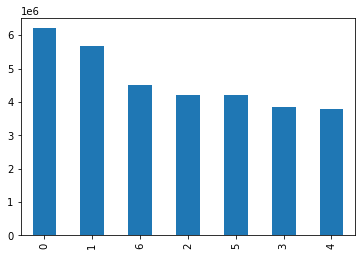

In [7]:
# create bar chart for order_day_of_week column
df_project['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

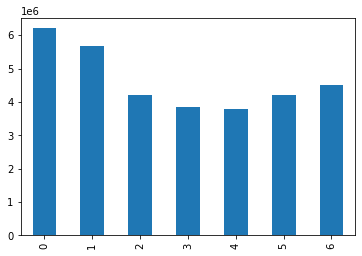

In [8]:
# sort based on index
df_project['order_day_of_week'].value_counts().sort_index().plot.bar()

## Histogram & Scatterplot

<AxesSubplot:ylabel='Frequency'>

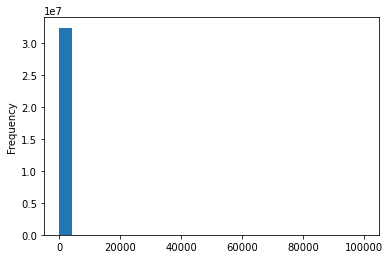

In [11]:
# create histogram
df_project['prices'].plot.hist(bins=25)

In [12]:
# data checking for prices column as we should have gotten 25 bars
df_project['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

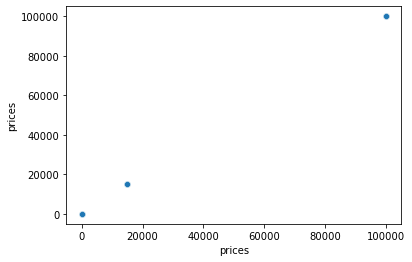

In [13]:
# create scatterplot to visualize the distribution of price data points 
sns.scatterplot(x = 'prices', y = 'prices', data = df_project)

# two outliers are identified, prices near 20,000 and even 100,000

In [14]:
# run exploratory checks
df_project.loc[df_project['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_order,spending_flag,median_freq,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,marital_status,income
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Higher-range product,Regularly busy,Regular busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Higher-range product,Regularly busy,Regular busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Higher-range product,Regularly busy,Regular busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Higher-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Higher-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,Higher-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,Higher-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,Higher-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,Higher-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898


In [15]:
# mark these data as missing by turning into NaNs
df_project.loc[df_project['prices']>100, 'prices'] = np.nan

In [17]:
# check
df_project['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [58]:
# export the project file
df_project.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_file.pkl'))

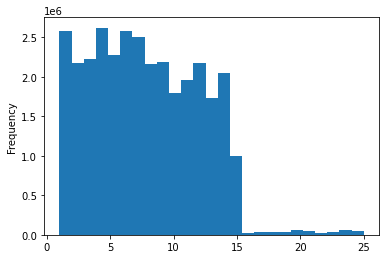

In [19]:
# create the histogram
hist = df_project['prices'].plot.hist(bins=25)

## Line Chart

In [20]:
# sample data, using 70/30 split

# set the seed for the random number generator
np.random.seed(4)

In [22]:
# generate random numbers for each row and check the condition (test = np.random.rand()<=0.7)
new_list = np.random.rand(len(df_project)) <= 0.7

In [24]:
# create a dataframe big with generated new_list
big = df_project[new_list]

In [26]:
# store 30% of the sample in the dataframe small
small = df_project[~new_list]

In [29]:
# reduce the samples to only those necessary columns
df_sample = small[['order_day_of_week', 'prices']]

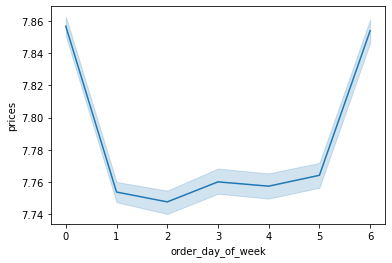

In [31]:
# create line chart
line = sns.lineplot(data = df_sample, x ='order_day_of_week', y ='prices')

# Q3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


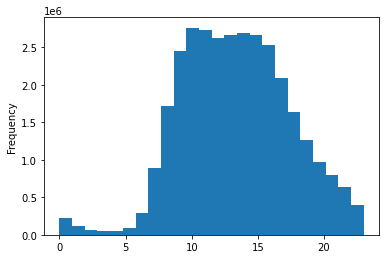

In [33]:
# create a histogram with bins = 24
hist_order = df_project['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows the frequency of purchases at different times of the day. Histogram distributions are left skewed by a relatively small order past midnight to early morning, peaking between 9am to 4pm.

In [38]:
# export the histogram
hist_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hod.png'))

# Q4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

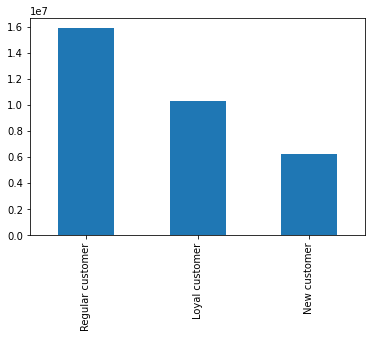

In [39]:
# create a bar chart from "loyalty flag"
bar_loyalty = df_project['loyalty_flag'].value_counts().plot.bar()

In [40]:
# export the bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

# Q5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [41]:
# sample data using 70/30 split

# set the seed for the random number generator
np.random.seed(4)

In [43]:
# generate random numbers for each row and check the condition (test = np.random.rand()<=0.7)
list = np.random.rand(len(df_project)) <= 0.7

In [44]:
# create a dataframe with generated list 
df_70 = df_project[list]

In [45]:
# create a dataframe to store the 30% of the sample
df_30 = df_project[~list]

In [46]:
# check the length of the dataframe
len(df_project)

32404859

In [47]:
# check the length of df_70 and df_30
len(df_70) + len (df_30)

32404859

In [49]:
# reduce the sample only to necessary column
df_30_reduced = df_30[['prices', 'order_hour_of_day']]

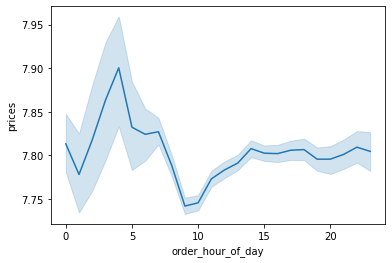

In [51]:
# create a line chart
line_prices = sns.lineplot(data = df_30_reduced, x='order_hour_of_day', y='prices')

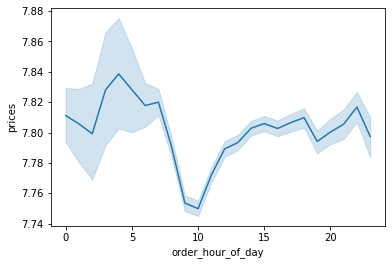

In [52]:
# create a line chart from entire dataframe to compare
df_reduced = df_project[['prices', 'order_hour_of_day']]
line_prices_entiredf = sns.lineplot(data = df_reduced, x='order_hour_of_day', y ='prices')

The shape of entire dataframe differs slightly from the line chart of the sample, but it shows the same fluctuation pattern. We can see from the line chart that expenditures fluctuate with the hours of the day. We can see that the expenditures increase after midnight (1-4am) and then decrease until 10am, when they increase again and stabilize from 3pm to midnight time.

In [53]:
# export the line chart
line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hod.png'))

# Q6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

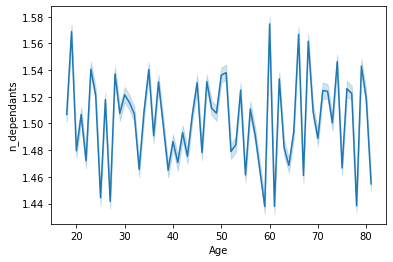

In [56]:
# create a line chart from small sample df_30
df_30_age_nod = df_30[['Age', 'n_dependants']]
line_age_nod = sns.lineplot(data = df_30_age_nod, x='Age', y='n_dependants')

No clear relationship is observed as the chart fluctuates without any visible pattern or trend. This may be due to the variability in the number of dependants at different age levels, which may be influenced by other factors beyond age, for example income level

In [57]:
# export the chart
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_nod.png'))

# Q7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [63]:
df_project['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

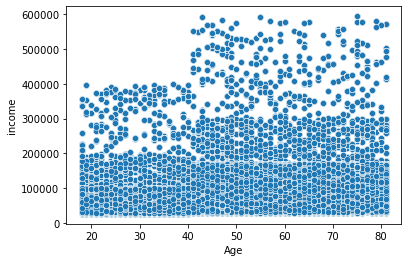

In [61]:
# create scatterplot to visualize the relationship between age and spending power
scatter_income = sns.scatterplot(x = 'Age', y = 'income', data = df_project)

There is a potential positive correlation betwen age and income in the above scatterplot. However, the presence of outliers, or individuals with exceptionally high income, is observed across different age groups.

From age 20-40, incomes clustered between 25-200K, and then spread out between 200-400K, showing a few outliers with higher incomes than general population of the same age group. 

Between age 40-80, income clusters between 25-300K (the upper income limit increases) and then spreads out from $300-600K, indicating individuals with higher income.

In [62]:
# export the scatterplot
scatter_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income.png'))